In [248]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_read = pd.read_csv(city_data_to_load)
ride_read = pd.read_csv(ride_data_to_load)
city_read = city_read.drop_duplicates("city", keep="first")
# Combine the data into a single dataset
cityride= pd.merge(city_read, ride_read, on="city")
cityride.head(5)



# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [249]:
#Calculate Average fare per city
cityride["fare"].mean()


26.75311157894739

In [250]:
#Total number of rides per city
total_rides_city = cityride.groupby('city').ride_id.count()
total_rides_city.head(5)

city
Amandaburgh      18
Barajasview      22
Barronchester    16
Bethanyland      18
Bradshawfurt     10
Name: ride_id, dtype: int64

In [251]:
#Total number of Drivers per city
total_drivers_city = cityride.groupby('type').driver_count.first()
total_drivers_city.head(5)

type
Rural        7
Suburban     7
Urban       38
Name: driver_count, dtype: int64

In [252]:
urban_cities = cityride[cityride["type"] == "Urban"]
urban_ride_count = urban_cities.groupby(['city']).count()['ride_id']
urban_average = urban_cities.groupby(['city']).mean()['fare']
urban_driver = urban_cities.groupby(['city']).first()['driver_count']


In [253]:
suburban_cities = cityride[cityride["type"] == "Suburban"]
suburban_ride_count = suburban_cities.groupby(['city']).count()['ride_id']
suburban_average = suburban_cities.groupby(['city']).mean()['fare']
suburban_driver = suburban_cities.groupby(['city']).first()['driver_count']

In [254]:
rural_cities = cityride[cityride["type"] == "Rural"]
rural_ride_count = rural_cities.groupby(['city']).count()['ride_id']
rural_average = rural_cities.groupby(['city']).mean()['fare']
rural_driver = rural_cities.groupby(['city']).first()['driver_count']

## Bubble Plot of Ride Sharing Data

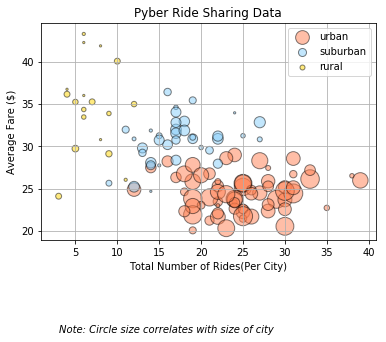

In [278]:
# Obtain the x and y coordinates for each of the three city type
plt.scatter(urban_ride_count, urban_average, s=urban_driver*5, c="coral", alpha = 0.5, label="urban", edgecolor="black")
plt.scatter(suburban_ride_count, suburban_average, s=suburban_driver*5, c="lightskyblue", alpha = 0.5, label="suburban", edgecolor="black")
plt.scatter(rural_ride_count, rural_average, s=rural_driver*5, c="gold", alpha = 0.5, label="rural", edgecolor="black")
# Build the scatter plots for each city types
plt.grid(True)
# Incorporate the other graph properties

# Create a legend
plt.legend(loc='best')
# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data")
plt.xlabel(("Total Number of Rides(Per City)"))
plt.ylabel(("Average Fare ($)"))

plt.text(3, 8, "Note: Circle size correlates with size of city", style="italic")
# Save Figure
plt.savefig("Images/bubbleplot.png")

In [256]:
# Show plot
plt.show()

## Total Fares by City Type

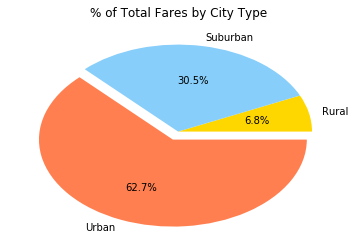

In [267]:
# Calculate Type Percents
total_fare_percentage = cityride.groupby(["type"]).sum()["fare"] / cityride["fare"].sum()*100
total_fare_percentage
# Build Pie Chart
plt.title("% of Total Fares by City Type")
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "LightSkyBlue", "Coral"]
explode = [0, 0, 0.1]
plt.pie(total_fare_percentage, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
# Save Figure
plt.savefig("Images/totalfares.png")

In [268]:
# Show Figure
plt.show()

## Total Rides by City Type

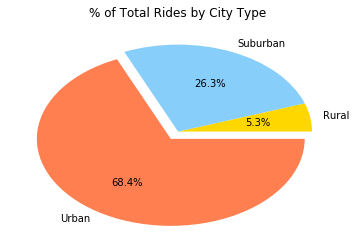

In [269]:
# Calculate Type Percents
total_ride_percentage = cityride.groupby(["type"]).count()["ride_id"]
total_ride_percentage
# Build Pie Chart
plt.title("% of Total Rides by City Type")
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "LightSkyBlue", "Coral"]
explode = [0, 0, 0.1]
plt.pie(total_ride_percentage, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
# Save Figure
plt.savefig("Images/totalrides.png")


In [270]:
# Show Figure
plt.show()

## Total Drivers by City Type

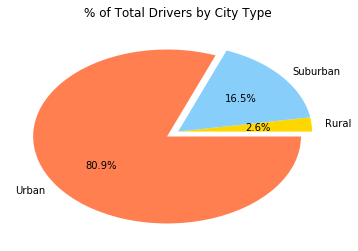

In [271]:
# Calculate Driver Percents
total_drivers_percentage = city_read.groupby(["type"])["driver_count"].sum()
total_drivers_percentage
# Build Pie Charts
plt.title("% of Total Drivers by City Type")
labels = ["Rural", "Suburban", "Urban"]
colors = ["Gold", "LightSkyBlue", "Coral"]
explode = [0, 0, 0.1]
plt.pie(total_drivers_percentage, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
# Save Figure
plt.savefig("Images/totaldrivers.png")

In [272]:
# Show Figure
plt.show()